<div style="text-align:center">
    <h1>Predicción de precios de una laptop</h1>
</div>

### Cargando librerias

In [1]:
library(MASS)
library(leaps)
library(alr4)
library(car)

Loading required package: car

Loading required package: carData

Loading required package: effects

lattice theme set by effectsTheme()
See ?effectsTheme for details.



### Cargando datos

In [2]:
datos <- read.csv("C:/Users/marti/OneDrive/Escritorio/jupyter/database/Laptop_price.csv")

head(datos)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Asus,3.830296,16,512,11.18515,2.641094,17395.093
2,Acer,2.912833,4,1000,11.31137,3.260012,31607.606
3,Lenovo,3.241627,4,256,11.85302,2.029061,9291.024
4,Acer,3.806248,16,512,12.28036,4.573865,17436.728
5,Acer,3.268097,32,1000,14.99088,4.193472,32917.991
6,HP,1.881348,16,256,11.94396,4.840268,9543.720


### Convirtiendo en factor la variable Brand

In [3]:
datos$Brand<-as.factor(datos$Brand)
head(datos)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Asus,3.830296,16,512,11.18515,2.641094,17395.093
2,Acer,2.912833,4,1000,11.31137,3.260012,31607.606
3,Lenovo,3.241627,4,256,11.85302,2.029061,9291.024
4,Acer,3.806248,16,512,12.28036,4.573865,17436.728
5,Acer,3.268097,32,1000,14.99088,4.193472,32917.991
6,HP,1.881348,16,256,11.94396,4.840268,9543.720


### Agregando variable indicadora

In [4]:
datos.trans <- transform(datos, indic=model.matrix(~ -1 + Brand, datos) )
head(datos.trans)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,indic.BrandAcer,indic.BrandAsus,indic.BrandDell,indic.BrandHP,indic.BrandLenovo
,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Asus,3.830296,16,512,11.18515,2.641094,17395.093,0,1,0,0,0
2,Acer,2.912833,4,1000,11.31137,3.260012,31607.606,1,0,0,0,0
3,Lenovo,3.241627,4,256,11.85302,2.029061,9291.024,0,0,0,0,1
4,Acer,3.806248,16,512,12.28036,4.573865,17436.728,1,0,0,0,0
5,Acer,3.268097,32,1000,14.99088,4.193472,32917.991,1,0,0,0,0
6,HP,1.881348,16,256,11.94396,4.840268,9543.720,0,0,0,1,0


### Ajustando modelo de regrresion lineal, donde para cada marca obtenemos un distinto modelo

In [6]:
regre_1 <- lm(Price ~ Brand*Processor_Speed*RAM_Size*Storage_Capacity*Screen_Size, data=datos.trans)
summary(regre_1)


Call:
lm(formula = Price ~ Brand * Processor_Speed * RAM_Size * Storage_Capacity * 
    Screen_Size, data = datos.trans)

Residuals:
    Min      1Q  Median      3Q     Max 
-579.29 -127.27    1.93  121.39  834.57 

Coefficients:
                                                                    Estimate
(Intercept)                                                       -6.929e+02
BrandAsus                                                          2.014e+03
BrandDell                                                          2.639e+03
BrandHP                                                           -2.205e+03
BrandLenovo                                                        1.311e+03
Processor_Speed                                                    3.576e+02
RAM_Size                                                           1.499e+02
Storage_Capacity                                                   3.171e+01
Screen_Size                                                        1.218e+02

### Ajustando un modelo de regresion lineal pero para cada marca que solo tenga distinto intercepto

In [7]:
regre_2 <- lm(Price ~ Brand+Processor_Speed+RAM_Size+Storage_Capacity+Screen_Size, data=datos.trans)
summary(regre_2)


Call:
lm(formula = Price ~ Brand + Processor_Speed + RAM_Size + Storage_Capacity + 
    Screen_Size, data = datos.trans)

Residuals:
   Min     1Q Median     3Q    Max 
-601.4 -128.8    0.1  130.2  851.7 

Coefficients:
                  Estimate Std. Error  t value Pr(>|t|)    
(Intercept)      514.23003   61.38269    8.377  < 2e-16 ***
BrandAsus         14.96369   19.45485    0.769    0.442    
BrandDell        -17.74494   19.34688   -0.917    0.359    
BrandHP          -12.93297   19.85960   -0.651    0.515    
BrandLenovo      -12.77443   19.82720   -0.644    0.520    
Processor_Speed  199.23882    8.53364   23.347  < 2e-16 ***
RAM_Size          50.48657    0.56885   88.752  < 2e-16 ***
Storage_Capacity  29.97563    0.01992 1505.094  < 2e-16 ***
Screen_Size       17.20746    3.65341    4.710 2.83e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 196.5 on 991 degrees of freedom
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.99

### Prueba de hipotesis

In [8]:
anova(regre_1,regre_2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,920,35677960,NA,NA,NA,NA
2,991,38279636,-71,-2601676,0.9448931,0.6074363


 Como el valor p es 0.6074363, que no es significativo a un nivel del 5%, lo que sugiere que no hay evidencia suficiente para rechazar la hipótesis nula, entonces no hay diferencias significativas entre los grupos.
 
En conclusion es mejor tomar el modelo con distinto intercepto

# Ahora encontremos un modelo para el cual no tomemos la variable regresora de Brand

### Escojamos las variables

In [9]:
 all.submodels <- regsubsets(Price ~ Processor_Speed + RAM_Size + Storage_Capacity + 
    Screen_Size + Weight, data=datos,  nbest=3)

In [10]:
 summary(all.submodels)

Subset selection object
Call: regsubsets.formula(Price ~ Processor_Speed + RAM_Size + Storage_Capacity + 
    Screen_Size + Weight, data = datos, nbest = 3)
5 Variables  (and intercept)
                 Forced in Forced out
Processor_Speed      FALSE      FALSE
RAM_Size             FALSE      FALSE
Storage_Capacity     FALSE      FALSE
Screen_Size          FALSE      FALSE
Weight               FALSE      FALSE
3 subsets of each size up to 5
Selection Algorithm: exhaustive
         Processor_Speed RAM_Size Storage_Capacity Screen_Size Weight
1  ( 1 ) " "             " "      "*"              " "         " "   
1  ( 2 ) " "             "*"      " "              " "         " "   
1  ( 3 ) "*"             " "      " "              " "         " "   
2  ( 1 ) " "             "*"      "*"              " "         " "   
2  ( 2 ) "*"             " "      "*"              " "         " "   
2  ( 3 ) " "             " "      "*"              " "         "*"   
3  ( 1 ) "*"             "*"     

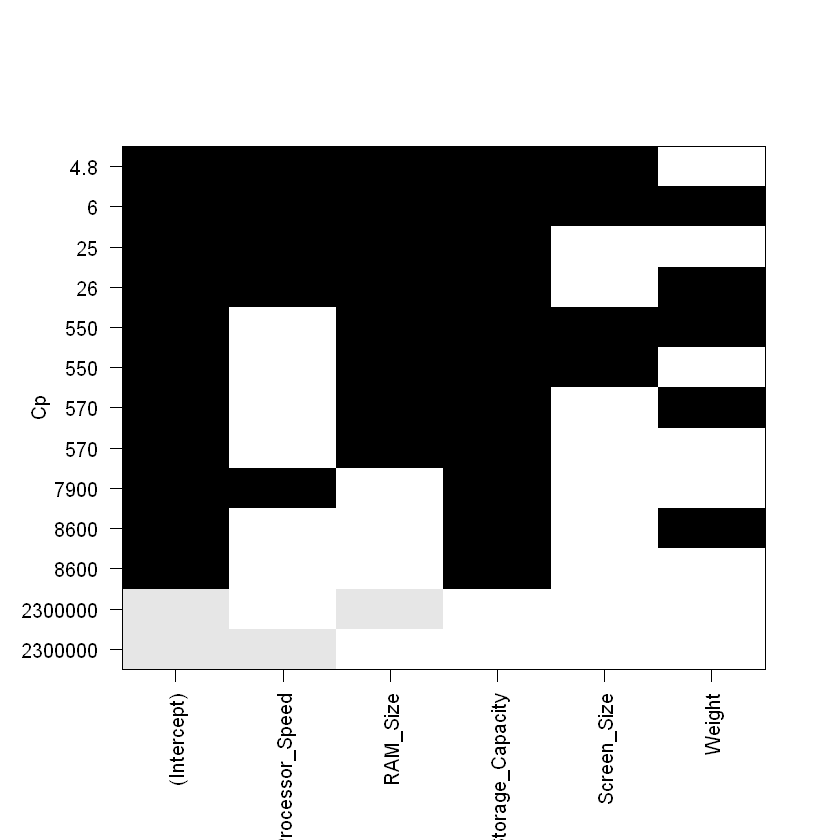

In [11]:
 plot(all.submodels, scale="Cp")

- Por el algoritmo concluimos que el mejor modelo toma como variables regresoras Processor_Speed, RAM_Size, Storage_Capacity y Screen_Size.
- Era esperado que la variable peso no fuera tan significativa para el modelo ya que hoy en dia las Latops las hacen muy ligeras por defecto.

### Ajustando el modelo de regresion lineal multiple donde solo tomemos las varibles regresoras, Processor_Speed, RAM_Size, Storage_Capacity y Screen_Size.

In [12]:
regre_3 <- lm(Price ~ Processor_Speed+RAM_Size+Storage_Capacity+Screen_Size, data=datos.trans)
summary(regre_3)


Call:
lm(formula = Price ~ Processor_Speed + RAM_Size + Storage_Capacity + 
    Screen_Size, data = datos.trans)

Residuals:
    Min      1Q  Median      3Q     Max 
-610.46 -128.89   -0.74  132.21  843.06 

Coefficients:
                  Estimate Std. Error  t value Pr(>|t|)    
(Intercept)      507.34279   59.66054    8.504  < 2e-16 ***
Processor_Speed  199.84390    8.51832   23.460  < 2e-16 ***
RAM_Size          50.42369    0.56629   89.043  < 2e-16 ***
Storage_Capacity  29.97688    0.01989 1507.174  < 2e-16 ***
Screen_Size       17.20327    3.64877    4.715 2.76e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 196.5 on 995 degrees of freedom
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.9996 
F-statistic: 5.72e+05 on 4 and 995 DF,  p-value: < 2.2e-16


# Prueba de hipotesis

In [13]:
anova(regre_2,regre_3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,991,38279636,NA,NA,NA,NA
2,995,38423323,-4,-143686.5,0.9299549,0.4457162


- Con esto conclumos que el mejor modelo es tomar el modelo en donde solo se tomen las variables regresoras, Processor_Speed, RAM_Size, Storage_Capacity y Screen_Size.
- Al parecer la variable Brand no tiene efecto, lo mas probables es que las marcas den la misma calidad del producto. 

# Comprobacion de supuestos

## supuesto de normalidad

### graficas de residuo

[1] "media de los residuos 1.50773005191951e-14"


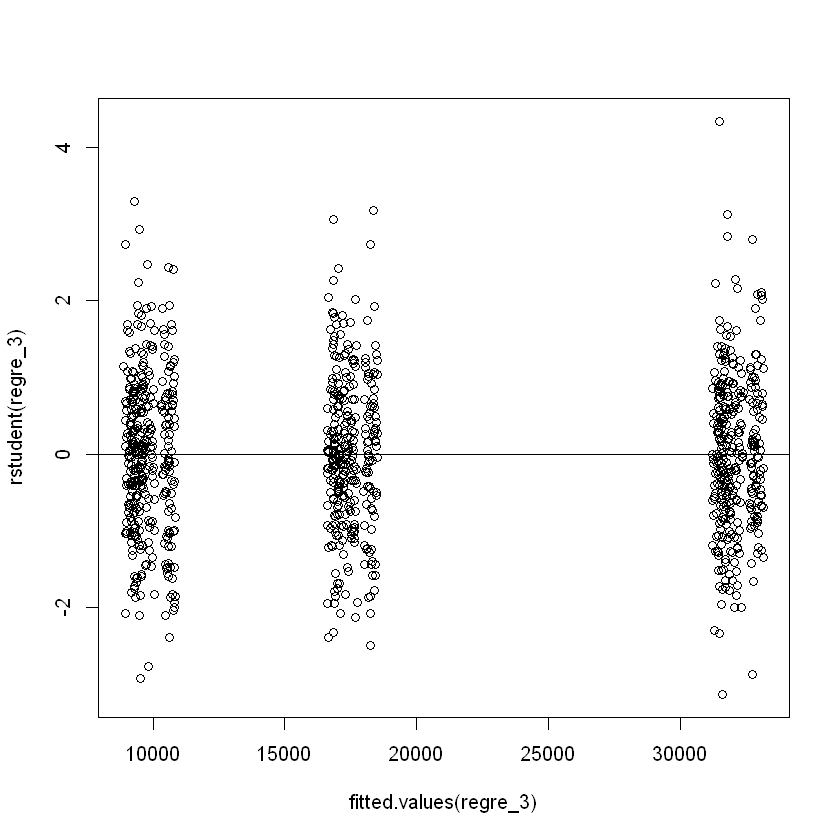

In [14]:
plot(fitted.values(regre_3),rstudent(regre_3))
abline(h=0)
print(paste("media de los residuos", mean(residuals(regre_3))))

### graficas matrginales

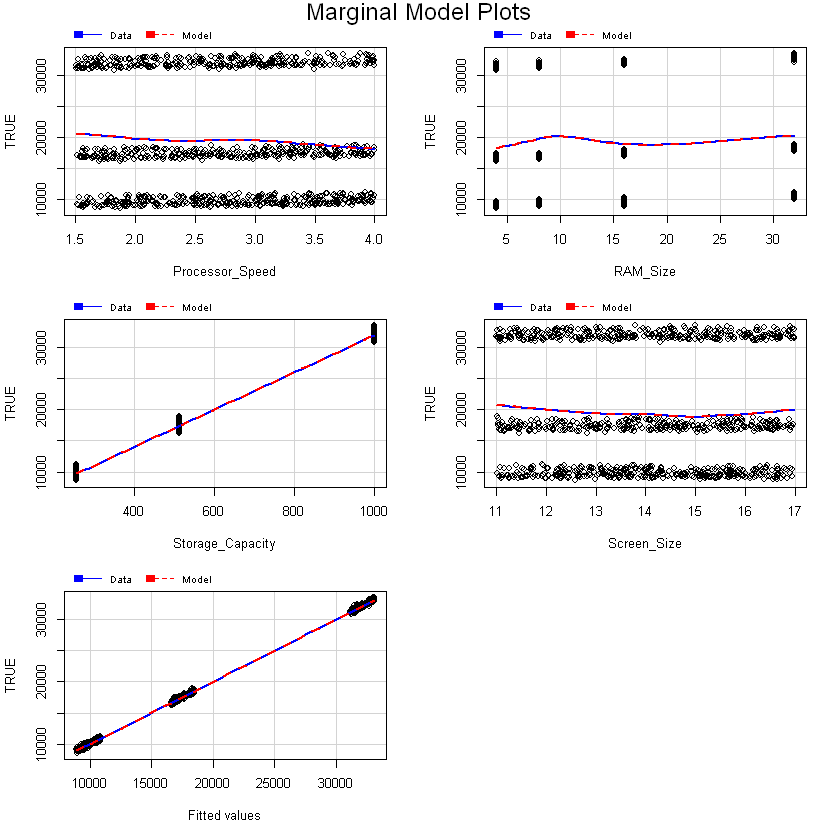

In [15]:
marginalModelPlots(regre_3)

# supuesto de normalidad

## grafica de probabilidad normal

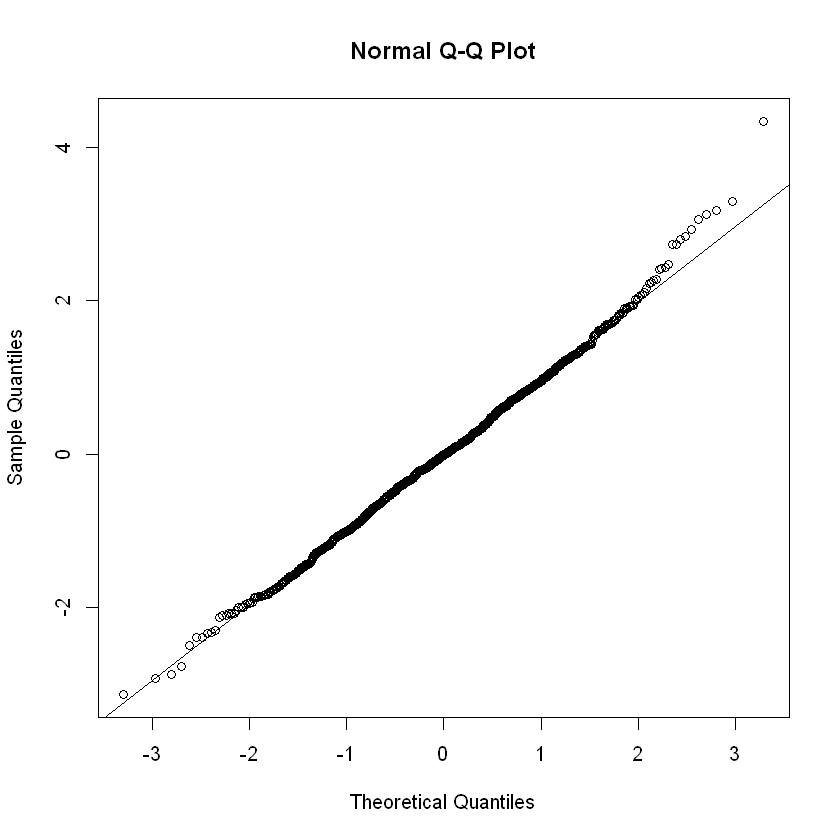

In [16]:
qqnorm(rstudent(regre_3))
qqline(rstudent(regre_3))

In [17]:
ks.test(residuals(regre_3),pnorm)


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  residuals(regre_3)
D = 0.49563, p-value < 2.2e-16
alternative hypothesis: two-sided


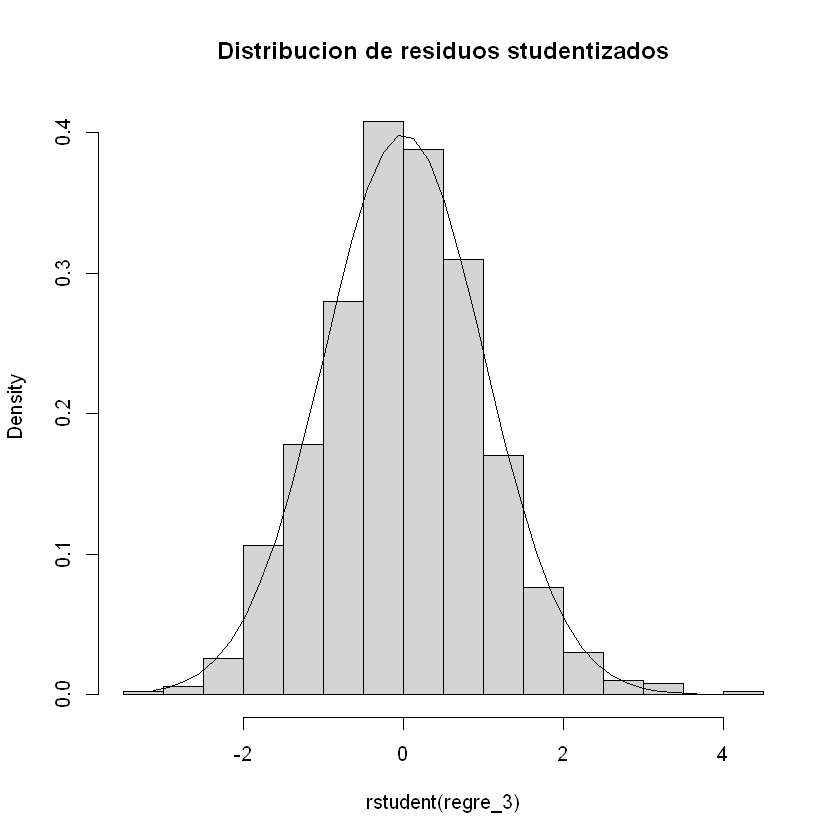

In [18]:
hist(rstudent(regre_3),freq=FALSE, main="Distribucion de residuos studentizados")
xfit<-seq(min(rstudent(regre_3)),max(rstudent(regre_3)),length=40)
yfit<-dnorm(xfit)
lines(xfit,yfit)

Conclusion los residuos siguen una distribucion normal

## Supuesto de homocedasticidad

In [29]:
ncvTest(regre_3)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.03909594, Df = 1, p = 0.84326

## Supuesto de independencia

In [30]:
durbinWatsonTest(regre_3)

 lag Autocorrelation D-W Statistic p-value
   1      0.01707386      1.963467   0.616
 Alternative hypothesis: rho != 0

- nuestro modelo final no viola los supuestos de Gauss-Markov